### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RAW de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1000, 1))
x_test = x_test.reshape((n_samples_test, 22, 1000, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000, 1)
(288, 22, 1000, 1)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 607us/sample - loss: 3.7834 - acc: 0.5208
kappa:  0.36111111111111116
confusion matrix:
 [[54 14  3  1]
 [ 5 22 12 33]
 [ 7 16 24 25]
 [ 3  7 12 50]]
(0.5211984708021925, 0.5208333333333333, 0.5111413499220647, None)


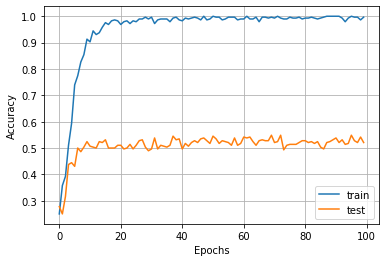

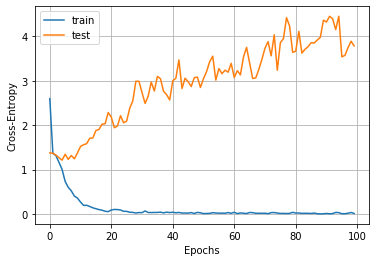

Iteration: 2
288/288 [==============================] - 0s 355us/sample - loss: 4.0595 - acc: 0.4306
kappa:  0.2407407407407407
confusion matrix:
 [[49  8 14  1]
 [10 16 29 17]
 [ 5 14 31 22]
 [ 3 12 29 28]]
(0.4410197158127125, 0.4305555555555556, 0.43040419186898726, None)


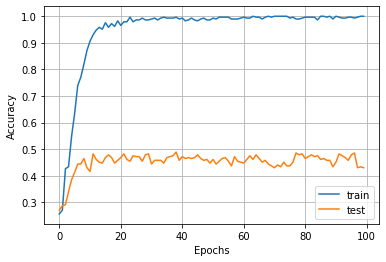

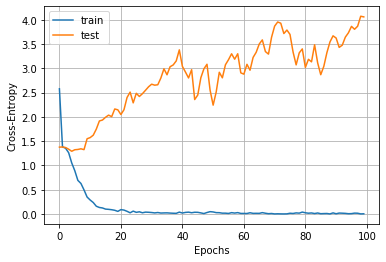

Iteration: 3
288/288 [==============================] - 0s 351us/sample - loss: 4.1672 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[40 16 13  3]
 [ 5 25 11 31]
 [ 1 19 25 27]
 [ 0 10  9 53]]
(0.5306637094986341, 0.4965277777777778, 0.49614665887122933, None)


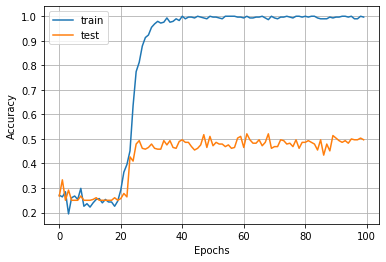

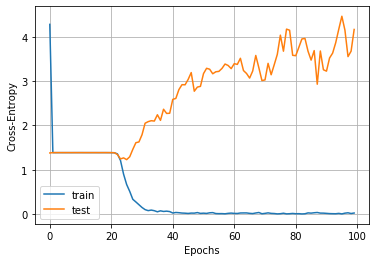

Iteration: 4
288/288 [==============================] - 0s 349us/sample - loss: 3.0813 - acc: 0.5104
kappa:  0.3472222222222222
confusion matrix:
 [[59 10  3  0]
 [ 8 21 20 23]
 [ 7 14 28 23]
 [ 4 12 17 39]]
(0.49885488608398826, 0.5104166666666666, 0.5022658371599269, None)


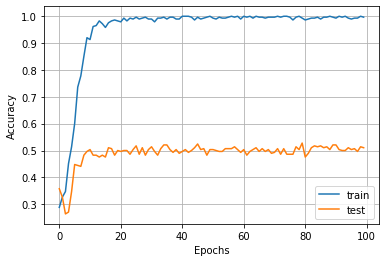

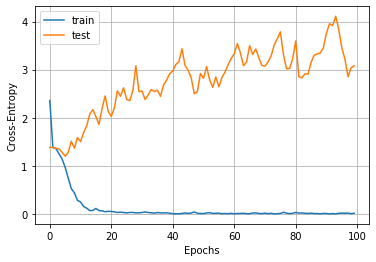

Iteration: 5
288/288 [==============================] - 0s 353us/sample - loss: 5.1903 - acc: 0.4132
kappa:  0.21759259259259256
confusion matrix:
 [[37 14 18  3]
 [ 8 23 18 23]
 [ 4 20 25 23]
 [ 2 19 17 34]]
(0.43956828743887194, 0.4131944444444444, 0.42111995945591535, None)


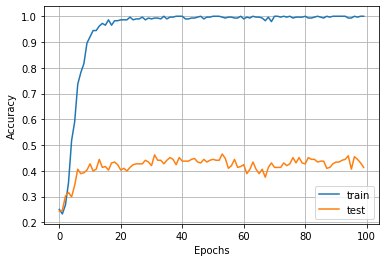

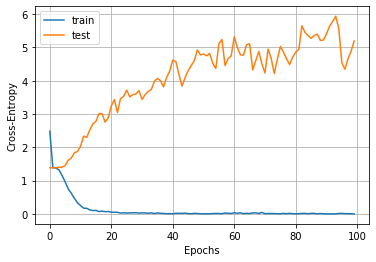

Iteration: 6
288/288 [==============================] - 0s 363us/sample - loss: 4.5179 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[41 13 17  1]
 [ 5 21 12 34]
 [ 3  9 31 29]
 [ 1  8 20 43]]
(0.5052834661902144, 0.4722222222222222, 0.47548405659788423, None)


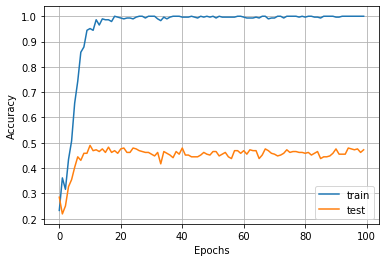

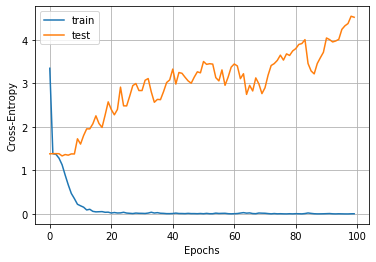

Iteration: 7
288/288 [==============================] - 0s 362us/sample - loss: 3.6298 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[59 10  3  0]
 [ 9 33  8 22]
 [11 32 13 16]
 [ 7 22  7 36]]
(0.4830235055977703, 0.4895833333333333, 0.47073646420354975, None)


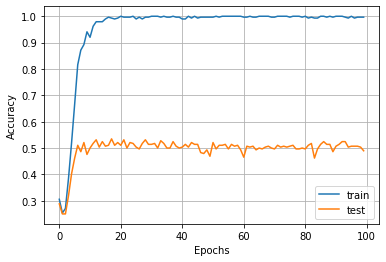

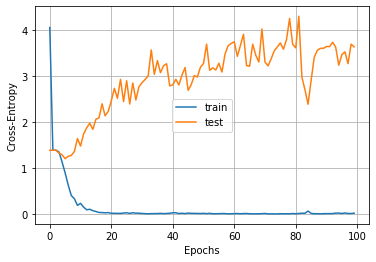

Iteration: 8
288/288 [==============================] - 0s 349us/sample - loss: 3.1752 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[58  8  6  0]
 [ 8 25 11 28]
 [10 11 24 27]
 [ 3 17 14 38]]
(0.4972447669162287, 0.5034722222222222, 0.4956776466663585, None)


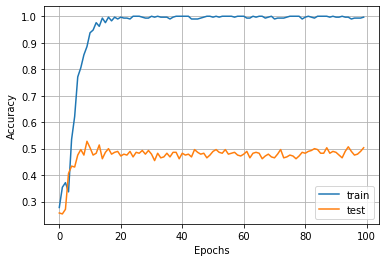

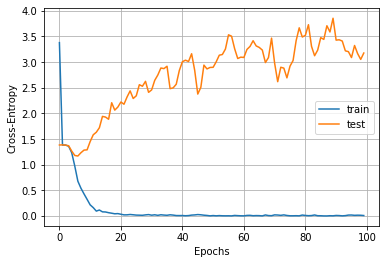

Iteration: 9
288/288 [==============================] - 0s 350us/sample - loss: 3.7150 - acc: 0.4861
kappa:  0.31481481481481477
confusion matrix:
 [[47 17  3  5]
 [ 4 25  8 35]
 [ 7 19 14 32]
 [ 1  9  8 54]]
(0.5016417198620589, 0.4861111111111111, 0.47044778502148676, None)


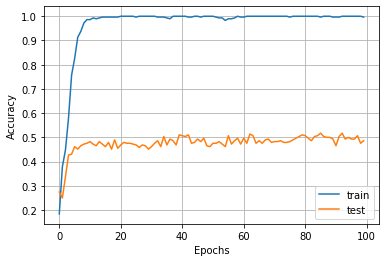

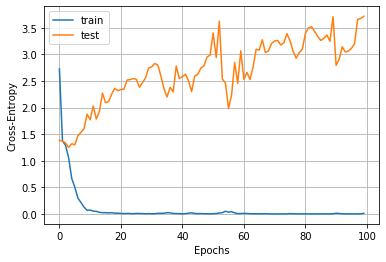

Iteration: 10
288/288 [==============================] - 0s 382us/sample - loss: 4.6890 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[45 18  7  2]
 [10 29  6 27]
 [ 9 25 16 22]
 [ 4 22  6 40]]
(0.46674466022088046, 0.4513888888888889, 0.44552942494790154, None)


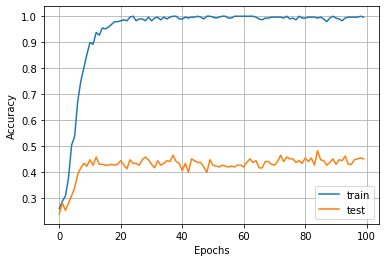

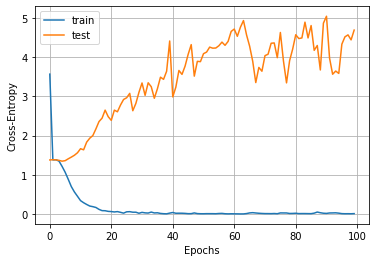


Resultados:
loss: [3.783385674158732, 4.059516668319702, 4.167230685551961, 3.081258906258477, 5.190262211693658, 4.5179496606191, 3.629794889026218, 3.1751849916246204, 3.7150366571214466, 4.689012951321072]
accuracy: [0.5208333, 0.43055555, 0.4965278, 0.5104167, 0.41319445, 0.4722222, 0.48958334, 0.5034722, 0.4861111, 0.4513889]
kappa: [0.36111111111111116, 0.2407407407407407, 0.3287037037037037, 0.3472222222222222, 0.21759259259259256, 0.2962962962962963, 0.3194444444444444, 0.3379629629629629, 0.31481481481481477, 0.2685185185185185]
precision: [0.5211984708021925, 0.4410197158127125, 0.5306637094986341, 0.49885488608398826, 0.43956828743887194, 0.5052834661902144, 0.4830235055977703, 0.4972447669162287, 0.5016417198620589, 0.46674466022088046]
recall: [0.5208333333333333, 0.4305555555555556, 0.4965277777777778, 0.5104166666666666, 0.4131944444444444, 0.4722222222222222, 0.4895833333333333, 0.5034722222222222, 0.4861111111111111, 0.4513888888888889]
f1: [0.5111413499220647, 0.4304

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,1000,1)))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 20, 998, 32)       320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 499, 32)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 497, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 248, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 63488)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8126592   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4774
std: (+/- 0.0336)
kappa: 0.3032
std: 0.0448
precision: 0.4885
recall: 0.4774
f1: 0.4719
